<a href="https://colab.research.google.com/github/felpscunha/projects_datascience/blob/main/o_perfil_de_um_cientista_de_dados_no_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Data Hackers - State of Data 2021
## O cenário do mercado de dados do Brasil
---
## Um mapeamento geral das atividades de um cientista de dados no Brasil em 2021.
---
#### Por Felipe Cunha
---
## Introdução
- Os dados utilizados nessa pesquisa foram obtidos entre 18/10/21 e 06/12/21;

- No estudo que será mostrado aqui, foram abordados os aspectos relativos as principais ferramentas utilizadas pelos profissionais de dados;
    - Esse mapeamento é muito importante para quem está iniciando na área (como eu) e quer ter uma visão real do que é exigido no mercado de trabalho.
    - O foco maior será na atuação do cientista de dados, em especial no cientista de dados júnior.
    - O foco será na utilização das Partes 4 e 8 da pesquisa além da relação de alguns dados com outras pesquisas já realizadas.

In [7]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# importando bibliotecas 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
pd.set_option('display.max.columns', 500)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [9]:
# parâmetros dos gráficos
# tamanho da figura
plt.rcParams['figure.figsize'] = 8, 5
# fonte, eixos e outras configurações
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['axes.labelpad'] = 10.0
plt.rcParams.update({"figure.figsize" : (12.8,9.6),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})

cores = ['#00876c',
          '#599e72',
          '#8eb47d',
          '#bfca8f',
          '#eee0a9',
          '#e9bd7f',
          '#e59761',
          '#df6d52',
          '#d43d51']

In [10]:
# funções utilizadas na análise dos dados
def buscador_colunas(parte_pesquisa, dataframe):
    '''
    parte_pesquisa = Código da parte a ser analisada da pesquisa. Exemplo: Parte 4 = P4
    dataframe = qual o dataframe que contém a pesquisa ou as perguntas a serem analisadas 
    '''
    perguntas = []
    for col in dataframe.columns:
        aux_col = col.split("(")
        if aux_col[1].startswith(parte_pesquisa):
            perguntas.append(col)
    return dataframe[perguntas]

def extrair_valores(df, posicao):
    '''
    retorna os valores relativos a determinada pergunta.
    df = conjunto de dados que contém a pergunta
    posicao = qual a posição do índice desejado.
    '''
    return df.iloc[posicao].sort_values(ascending=False).reset_index(drop=True).to_list()

def extrair_chaves(df, posicao):
    '''
    retorna as chaves relativas a determinada pergunta, ou seja, retorna a pergunta em si.
    df = qual o dataframe que contém a pergunta.
    posicao = qual a posição desejada, assim como na função de extrair_valores.
    '''
    keys = df.iloc[posicao].sort_values(ascending=False).keys().to_list()
    lista_provisoria = []
    for k in keys:
        c = k.split("'")
        lista_provisoria.append(c[3])
    return lista_provisoria

## Uma visão geral sobre o conjunto de dados disponível

In [11]:
# caminhos para as pesquisas utilizadas nesse notebook
path_21 = "/content/State of Data 2021 - Dataset - Pgina1.csv"


# criação dos DFs
df_21 = pd.read_csv(path_21)


df_21.head(1) # dando uma olhada no DF da pesquisa State of Data Brazil 2021

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')","('P1_i ', 'Área de Formação')","('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_e ', 'Cargo como Gestor')","('P2_f ', 'Cargo Atual')","('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')","('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')","('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')","('P2_l_a ', 'Falta de oportunidade de crescimento no emprego atual')","('P2_l_b ', 'Salário atual não corresponde ao mercado')","('P2_l_c ', 'Não tenho uma boa relação com meu líder/gestor')","('P2_l_d ', 'Gostaria de trabalhar em em outra área de atuação')","('P2_l_e ', 'Gostaria de receber mais benefícios')","('P2_l_f ', 'O clima de trabalho/ambiente não é bom')","('P2_l_g ', 'Falta de maturidade analítica na empresa')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')","('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')","('P2_o_a ', 'Remuneração/Salário')","('P2_o_b ', 'Benefícios')","('P2_o_c ', 'Propósito do trabalho e da empresa')","('P2_o_d ', 'Flexibilidade de trabalho remoto')","('P2_o_e ', 'Ambiente e clima de trabalho')","('P2_o_f ', 'Oportunidade de aprendizado e trabalhar com referências na área')","('P2_o_g ', 'Plano de carreira e oportunidades de crescimento profissional')","('P2_o_h ', 'Maturidade da empresa em termos de tecnologia e dados')","('P2_o_i ', 'Qualidade dos gestores e líderes')","('P2_o_j ', 'Reputação que a empresa tem no mercado')","('P2_q ', 'Atualmente qual a sua forma de trabalho?')","('P2_r ', 'Qual a forma de trabalho ideal para você?')","('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')","('P3_b ', 'Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?')","('P3_b_a ', 'Analytics Engineer')","('P3_b_b ', 'Engenharia de Dados/Data Engineer')","('P3_b_c ', 'Analista de Dados/Data Analyst')","('P3_b_d ', 'Cientista de Dados/Data Scientist')","('P3_b_e ', 'Database Administrator/DBA')","('P3_b_f ', 'Analista de Business Intelligence/BI')","('P3_b_g ', 'Arquiteto de Dados/Data Architect')","('P3_b_h ', 'Data Product Manager/DPM')","('P3_b_i ', 'Business Analyst')","('P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?')","('P3_c_a ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')","('P3_c_b ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')","('P3_c_c ', 'Atração, seleção e contratação de talentos para o time de dados.')","('P3_c_d ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')","('P3_c_e ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')","('P3_c_f ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')","('P3_c_g ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')","('P3_c_h ', 'Apesar de ser gestor ainda atuo na part

In [12]:
print(f'O conjunto de dados disponível tem o seguinte formato: \n\033[1mNúmero de entrevistados\033[0m: {df_21.shape[0]}. \n\033[1mNúmero de perguntas\033[0m: {df_21.shape[1]}.')

O conjunto de dados disponível tem o seguinte formato: 
Número de entrevistados: 2312. 
Número de perguntas: 356.


In [13]:
soma_cargos = df_21[["('P2_f ', 'Cargo Atual')"]].value_counts(normalize=True)[:4].sum()
principais_cargos = df_21[["('P2_f ', 'Cargo Atual')"]].value_counts(normalize=True).to_frame(name='% Entrevistados')
print(f'A soma dos \033[1mquatro cargos mais citados na pesquisa\033[0m correspondeu a \033[1m{soma_cargos*100:.2f}%.\033[0m')
print(f'\nA lista correspondeu a: \n\n{principais_cargos.iloc[:11]*100}')

A soma dos quatro cargos mais citados na pesquisa correspondeu a 70.71%.

A lista correspondeu a: 

                                                    % Entrevistados
('P2_f ', 'Cargo Atual')                                           
Cientista de Dados/Data Scientist                         18.667505
Analista de BI/BI Analyst/Analytics Engineer              18.604651
Analista de Dados/Data Analyst                            17.347580
Engenheiro de Dados/Data Engineer                         16.090509
Outro                                                      6.285355
Analista de Negócios/Business Analyst                      5.216845
Desenvolvedor ou Engenheiro de Software                    4.965431
Engenheiro de Machine Learning/ML Engineer                 2.325581
Outras Engenharias (não inclui dev)                        1.885607
Estatístico                                                1.508485
Analista de Inteligência de Mercado/Market Inte...         1.068510


## Aspecto geral dos entrevistados
---
### Composição da amostra:

- Como já mencionado, cerca de 70% dos entrevistados atuam nos 4 cargos destacados anteriormente:
    1. Cientista de Dados (DC)
    2. Analista de BI (BI)
    3. Analista de Dados (DA)
    4. Engenheiro(a) de Dados (DE)

- Os outros cargos mencionados incluem, dentre outros, professores, estatísticos, desenvolvedores de softwares, analistas de negócios, etc.
---
### Dois gráficos foram plotados para melhor observar a distribuição dos entrevistados entre os 4 maiores cargos citados além da distribuição entre o nível de senioridade dos entrevistados, o qual variou entre três categorias: júnior, pleno e sênior.

##### <center><b>Figura 1</b>: Perfil geral dos profissionais de dados no Brasil em 2021.</center>


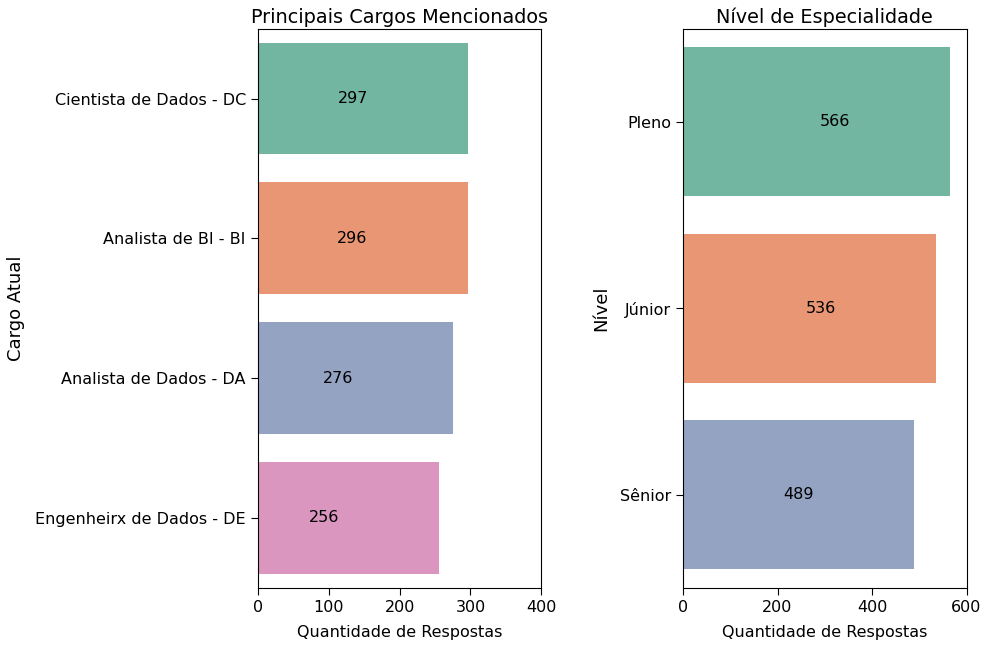

In [14]:
# Melhorando a visualização das informações nos gráficos seguintes através da substituição dos nomes por outros mais simples.
df_21["('P2_f ', 'Cargo Atual')"].replace('Cientista de Dados/Data Scientist', 'Cientista de Dados - DC', inplace=True)
df_21["('P2_f ', 'Cargo Atual')"].replace('Analista de BI/BI Analyst/Analytics Engineer', 'Analista de BI - BI', inplace=True)
df_21["('P2_f ', 'Cargo Atual')"].replace('Analista de Dados/Data Analyst', 'Analista de Dados - DA', inplace=True)
df_21["('P2_f ', 'Cargo Atual')"].replace('Engenheiro de Dados/Data Engineer', 'Engenheirx de Dados - DE', inplace=True)

# gráficos de barras
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.5)

bar1 = sns.countplot(y="('P2_f ', 'Cargo Atual')", data=df_21, order=df_21["('P2_f ', 'Cargo Atual')"].value_counts().index[:4], orient='h', ax=ax[0], palette='Set2')
bar2 = sns.countplot(y="('P2_g ', 'Nivel')", data=df_21, order=df_21["('P2_g ', 'Nivel')"].value_counts().index, ax=ax[1], orient='h', palette='Set2')

ax[0].title.set_text('Principais Cargos Mencionados')
ax[0].set_xlabel('Quantidade de Respostas')
ax[0].set_ylabel('Cargo Atual', fontsize=18)

for p in ax[0].patches:
    ax[0].annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-100, 0), textcoords='offset points', ha="right", va="center")

ax[1].title.set_text('Nível de Especialidade')
ax[1].set_xlabel('Quantidade de Respostas')
ax[1].set_ylabel('Nível', fontsize=18)

for p in ax[1].patches:
    ax[1].annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-100, 0), textcoords='offset points', ha="right", va="center")
plt.show()

#### Percebe-se que o cargo mais citado é o de Cientista de Dados e a maioria dos entrevistados, entre todos os cargos, possui nível pleno. Porém, a distribuição entre essas categorias também é bem distribuída. 

##### <center><b>Tabela 1</b>: Distribuição do nível de especialidade dentro dos principais cargos elencados na pesquisa.</center>

In [15]:
df_grau = df_21.groupby("('P2_f ', 'Cargo Atual')")["('P2_g ', 'Nivel')"].value_counts().to_frame(name='Nº Entrevistados')

df_grau.loc[['Analista de Dados - DA', 'Analista de BI - BI', 'Cientista de Dados - DC', 'Engenheirx de Dados - DE']]

Nº Entrevistados
('P2_f ', 'Cargo Atual') ('P2_g ', 'Nivel')                  
Analista de Dados - DA   Júnior                           110
                         Pleno                             88
                         Sênior                            78
Analista de BI - BI      Pleno                            110
                         Júnior                           104
                         Sênior                            82
Cientista de Dados - DC  Pleno                            126
                         Júnior                            93
                         Sênior                            78
Engenheirx de Dados - DE Pleno                             95
                         Sênior                            88
                         Júnior                            73

In [16]:
df_P4 = buscador_colunas("'P4", df_21)
df_P4.head()

,"('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')","('P4_a ', 'Atuacao')","('P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?')","('P4_b_a ', 'Dados relacionais (estruturados em bancos SQL)')","('P4_b_b ', 'Dados armazenados em bancos NoSQL')","('P4_b_c ', 'Imagens')","('P4_b_d ', 'Textos/Documentos')","('P4_b_e ', 'Vídeos')","('P4_b_f ', 'Áudios')","('P4_b_g ', 'Planilhas')","('P4_b_h ', 'Dados georeferenciados')","('P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?')","('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')","('P4_c_b ', 'Dados armazenados em bancos NoSQL')","('P4_c_c ', 'Imagens')","('P4_c_d ', 'Textos/Documentos')","('P4_c_e ', 'Vídeos')","('P4_c_f ', 'Áudios')","('P4_c_g ', 'Planilhas')","('P4_c_h ', 'Dados georeferenciados')","('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')","('P4_d_a ', 'SQL')","('P4_d_b ', 'R ')","('P4_d_c ', 'Python')","('P4_d_d ', 'C/C++/C#')","('P4_d_e ', '.NET')","('P4_d_f ', 'Java')","('P4_d_g ', 'Julia')","('P4_d_h ', 'SAS/Stata')","('P4_d_i ', 'Visual Basic/VBA')","('P4_d_j ', 'Scala')","('P4_d_k ', 'Matlab')","('P4_d_l ', 'PHP')","('P4_d_m ', 'Javascript')","('P4_d_n ', 'Não utilizo nenhuma linguagem')","('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')","('P4_e_a ', 'SQL')","('P4_e_b ', 'R ')","('P4_e_c ', 'Python')","('P4_e_d ', 'C/C++/C#')","('P4_e_e ', '.NET')","('P4_e_f ', 'Java')","('P4_e_g ', 'Julia')","('P4_e_h ', 'SAS/Stata')","('P4_e_i ', 'Visual Basic/VBA')","('P4_e_j ', 'Scala')","('P4_e_k ', 'Matlab')","('P4_e_l ', 'PHP')","('P4_e_m ', 'Javascript')","('P4_e_n ', 'Não utilizo nenhuma linguagem')","('P4_f ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?')","('P4_f_a ', 'MySQL')","('P4_f_b ', 'Oracle')","('P4_f_c ', 'SQL SERVER')","('P4_f_d ', 'SAP')","('P4_f_e ', 'Amazon Aurora ou RDS')","('P4_f_f ', 'Amazon DynamoDB')","('P4_f_g ', 'CoachDB')","('P4_f_h ', 'Cassandra')","('P4_f_i ', 'MongoDB')","('P4_f_j ', 'MariaDB')","('P4_f_k ', 'Datomic')","('P4_f_l ', 'S3')","('P4_f_m ', 'PostgreSQL')","('P4_f_n ', 'ElasticSearch')","('P4_f_o ', 'DB2')","('P4_f_p ', 'Microsoft Access')","('P4_f_q ', 'SQLite')","('P4_f_r ', 'Sybase')","('P4_f_s ', 'Firebase')","('P4_f_t ', 'Vertica')","('P4_f_u ', 'Redis')","('P4_f_v ', 'Neo4J')","('P4_f_x ', 'Google BigQuery')","('P4_f_y ', 'Google Firestore')","('P4_f_z ', 'Amazon Redshift')","('P4_f_z1 ', 'Amazon Athena')","('P4_f_z2 ', 'Snowflake')","('P4_f_z3 ', 'Databricks')","('P4_f_z4 ', 'HBase')","('P4_f_z5 ', 'Presto')","('P4_f_z6 ', 'Splunk')","('P4_f_z7 ', 'SAP HANA')","('P4_f_z8 ', 'Hive')","('P4_f_z9 ', 'Firebird')","('P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?')","('P4_g_a ', 'Amazon Web Services (AWS)')","('P4_g_b ', 'Google Cloud (GCP)')","('P4_g_c ', 'Azure (Microsoft)')","('P4_g_d ', 'Oracle Cloud')","('P4_g_e ', 'IBM')","('P4_g_f ', 'Servidores On Premise/Não utilizamos Cloud')","('P4_g_g ', 'Cloud Própria')","('P4_h ', 'Quais as Ferramentas de Business Intelligence você utiliza no trabalho?')","('P4_h_a ', 'Microsoft PowerBI')","('P4_h_b ', 'Qlik View/Qlik Sense')","('P4_h_c ', 'Tableau')","('P4_h_d ', 'Metabase')","('P4_h_e ', 'Superset')","('P4_h_f ', 'Redash')","('P4_h_g ', 'MicroStrategy')","('P4_h_h ', 'IBM Analytics/Cognos')","('P4_h_i ', 'SAP Business Objects')","('P4_h_j ', 'Oracle Business Intelligence')","('P4_h_k ', 'Amazon QuickSight')","('P4_h_l ', 'Salesforce/Einstein Analytics')","('P4_h_m ', 'Mode')","('P4_h_n ', 'Alteryx')","('P4_h_o ', 'Birst')","('P4_h_p ', 'Looker')","('P4_h_q ', 'Google Data Studio')","('P4_h_r ', 'SAS Visual Analytics')","('P4_h_s ', 'Grafana')","('P4_h_t ', 'TIBCO Spotfire')","('P4_h_u ', 'Pentaho')","('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou 

## Análise geral da parte 4 da pesquisa com toda as informações relativas as principais trilhas da área de dados.
#### - Esses dados serão discutidos pergunta a pergunta logo em seguida.
#### - Foi escolhido focar em 3 áreas: <b>Análise de Dados, Ciência de Dados e Engenharia de Dados</b>.

##### <center><b>Tabela 2</b>: Perfil dos dados da Parte 4 da pesquisa agrupados por cargos.</center>

In [17]:
df_analise_P4 = df_P4.groupby("('P4_a ', 'Atuacao')").sum()
df_analise_P4.loc[['Análise de Dados', 'Ciência de Dados', 'Engenharia de Dados']]

,"('P4_b_a ', 'Dados relacionais (estruturados em bancos SQL)')","('P4_b_b ', 'Dados armazenados em bancos NoSQL')","('P4_b_c ', 'Imagens')","('P4_b_d ', 'Textos/Documentos')","('P4_b_e ', 'Vídeos')","('P4_b_f ', 'Áudios')","('P4_b_g ', 'Planilhas')","('P4_b_h ', 'Dados georeferenciados')","('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')","('P4_c_b ', 'Dados armazenados em bancos NoSQL')","('P4_c_c ', 'Imagens')","('P4_c_d ', 'Textos/Documentos')","('P4_c_e ', 'Vídeos')","('P4_c_f ', 'Áudios')","('P4_c_g ', 'Planilhas')","('P4_c_h ', 'Dados georeferenciados')","('P4_d_a ', 'SQL')","('P4_d_b ', 'R ')","('P4_d_c ', 'Python')","('P4_d_d ', 'C/C++/C#')","('P4_d_e ', '.NET')","('P4_d_f ', 'Java')","('P4_d_g ', 'Julia')","('P4_d_h ', 'SAS/Stata')","('P4_d_i ', 'Visual Basic/VBA')","('P4_d_j ', 'Scala')","('P4_d_k ', 'Matlab')","('P4_d_l ', 'PHP')","('P4_d_m ', 'Javascript')","('P4_d_n ', 'Não utilizo nenhuma linguagem')","('P4_e_a ', 'SQL')","('P4_e_b ', 'R ')","('P4_e_c ', 'Python')","('P4_e_d ', 'C/C++/C#')","('P4_e_e ', '.NET')","('P4_e_f ', 'Java')","('P4_e_g ', 'Julia')","('P4_e_h ', 'SAS/Stata')","('P4_e_i ', 'Visual Basic/VBA')","('P4_e_j ', 'Scala')","('P4_e_k ', 'Matlab')","('P4_e_l ', 'PHP')","('P4_e_m ', 'Javascript')","('P4_e_n ', 'Não utilizo nenhuma linguagem')","('P4_f_a ', 'MySQL')","('P4_f_b ', 'Oracle')","('P4_f_c ', 'SQL SERVER')","('P4_f_d ', 'SAP')","('P4_f_e ', 'Amazon Aurora ou RDS')","('P4_f_f ', 'Amazon DynamoDB')","('P4_f_g ', 'CoachDB')","('P4_f_h ', 'Cassandra')","('P4_f_i ', 'MongoDB')","('P4_f_j ', 'MariaDB')","('P4_f_k ', 'Datomic')","('P4_f_l ', 'S3')","('P4_f_m ', 'PostgreSQL')","('P4_f_n ', 'ElasticSearch')","('P4_f_o ', 'DB2')","('P4_f_p ', 'Microsoft Access')","('P4_f_q ', 'SQLite')","('P4_f_r ', 'Sybase')","('P4_f_s ', 'Firebase')","('P4_f_t ', 'Vertica')","('P4_f_u ', 'Redis')","('P4_f_v ', 'Neo4J')","('P4_f_x ', 'Google BigQuery')","('P4_f_y ', 'Google Firestore')","('P4_f_z ', 'Amazon Redshift')","('P4_f_z1 ', 'Amazon Athena')","('P4_f_z2 ', 'Snowflake')","('P4_f_z3 ', 'Databricks')","('P4_f_z4 ', 'HBase')","('P4_f_z5 ', 'Presto')","('P4_f_z6 ', 'Splunk')","('P4_f_z7 ', 'SAP HANA')","('P4_f_z8 ', 'Hive')","('P4_f_z9 ', 'Firebird')","('P4_g_a ', 'Amazon Web Services (AWS)')","('P4_g_b ', 'Google Cloud (GCP)')","('P4_g_c ', 'Azure (Microsoft)')","('P4_g_d ', 'Oracle Cloud')","('P4_g_e ', 'IBM')","('P4_g_f ', 'Servidores On Premise/Não utilizamos Cloud')","('P4_g_g ', 'Cloud Própria')","('P4_h_a ', 'Microsoft PowerBI')","('P4_h_b ', 'Qlik View/Qlik Sense')","('P4_h_c ', 'Tableau')","('P4_h_d ', 'Metabase')","('P4_h_e ', 'Superset')","('P4_h_f ', 'Redash')","('P4_h_g ', 'MicroStrategy')","('P4_h_h ', 'IBM Analytics/Cognos')","('P4_h_i ', 'SAP Business Objects')","('P4_h_j ', 'Oracle Business Intelligence')","('P4_h_k ', 'Amazon QuickSight')","('P4_h_l ', 'Salesforce/Einstein Analytics')","('P4_h_m ', 'Mode')","('P4_h_n ', 'Alteryx')","('P4_h_o ', 'Birst')","('P4_h_p ', 'Looker')","('P4_h_q ', 'Google Data Studio')","('P4_h_r ', 'SAS Visual Analytics')","('P4_h_s ', 'Grafana')","('P4_h_t ', 'TIBCO Spotfire')","('P4_h_u ', 'Pentaho')","('P4_h_v ', 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google')","('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')"
"('P4_a ', 'Atuacao')",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Análise de Dados,637.0,178.0,68.0,388.0,20.0,18.0,685.0,226.0,562.0,51.0,7.0,71.0,0.0,0.0,524.0,16.0,574.0,131.0,440.0,15.0,9.0,55.0,2.0,33.0,114.0,9.0,7.0,12.0,48.0,81.0,399.0,42.0,151.0,1.0,0.0,7.0,0.0,8.0,33.0,3.0,0.0,2.0,7.0,83.0,199.0,149.0,278.0,41.0,16.0,10.0,0.0,5.0,47.0,19.0,1.0,68.0,174.0,18.0,16.0,50.0,28.0,4.0,24.0,1.0,15.0,5.0,112.0,3.0,63.0,57.0,25.0,59.0,5.0,18.0,3.0,41.0,36.0,5.0,251.0,138.0,201.0,35.0,11.0,193.0,68.0,491.0,55.0,139.0,58.0,6.0,15.0,13.0,11.0,17.0,11.0,14.0,22.0,3.0,28.0,0.0,37.0,158.0,11.0,21.0,11.0,48.0,110.0,16.0
Ciência de Dados,312.0,134

In [18]:
P4_b = buscador_colunas("'P4_b", df_analise_P4)
P4_b

,"('P4_b_a ', 'Dados relacionais (estruturados em bancos SQL)')","('P4_b_b ', 'Dados armazenados em bancos NoSQL')","('P4_b_c ', 'Imagens')","('P4_b_d ', 'Textos/Documentos')","('P4_b_e ', 'Vídeos')","('P4_b_f ', 'Áudios')","('P4_b_g ', 'Planilhas')","('P4_b_h ', 'Dados georeferenciados')"
"('P4_a ', 'Atuacao')",,,,,,,,
Análise de Dados,637.0,178.0,68.0,388.0,20.0,18.0,685.0,226.0
Buscando emprego na área de dados.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ciência de Dados,312.0,134.0,100.0,213.0,26.0,27.0,282.0,129.0
Engenharia de Dados,342.0,228.0,61.0,240.0,11.0,13.0,295.0,109.0
Gestor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Outra,104.0,32.0,22.0,79.0,8.0,8.0,141.0,22.0


## Análise das respostas às perguntas feitas na Parte 4 da Pesquisa.
### O objetivo aqui é mostrar as principais ferramentas utilizadas e atividades realizadas por um cientista de dados no dia a dia.
---
### A primeira questão é: de que fontes os cientista de dados bebem?

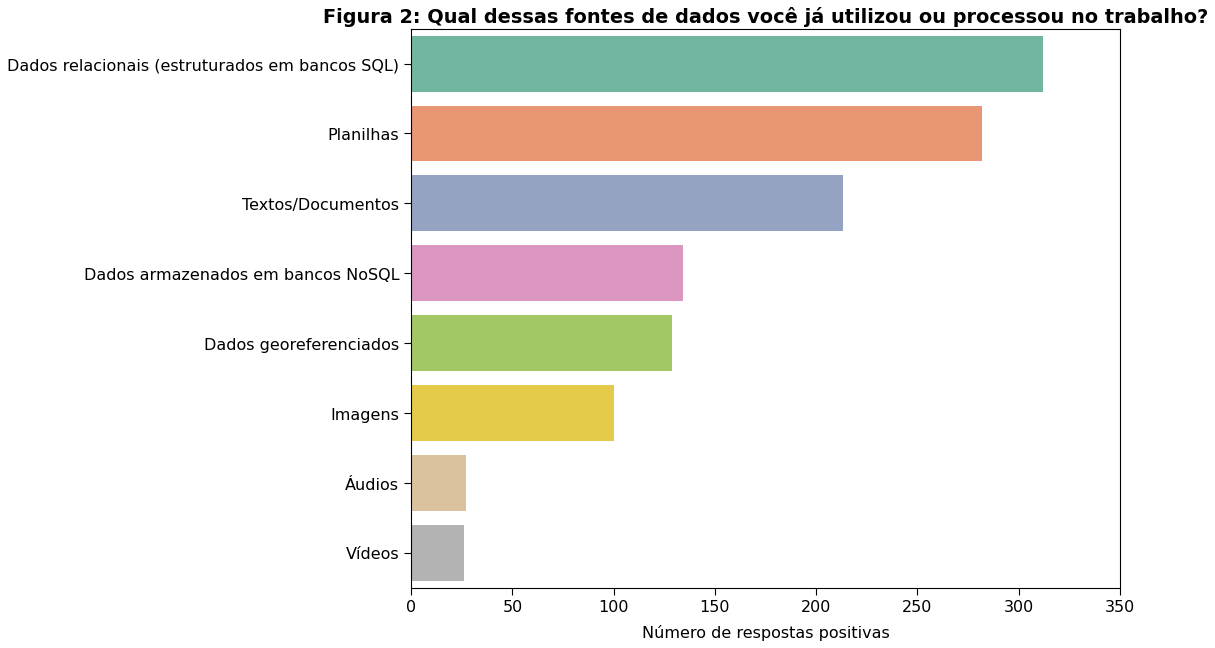

In [19]:
valores_p4b = extrair_valores(P4_b, 2)
chaves_p4b = extrair_chaves(P4_b, 2)

sns.barplot(x=valores_p4b, y=chaves_p4b, orient='h', palette='Set2')

plt.title('Figura 2: Qual dessas fontes de dados você já utilizou ou processou no trabalho?', fontweight="bold")
plt.xlabel('Número de respostas positivas')
plt.show()

### Percebe-se que as principais fontes de dados são os dados relacionais em bancos de dados SQL, planilhas e documentos de texto! 
#### - Percebe-se que analisar dados tabulares é de extrema importância para o cargo;
#### - Não é a toa que é tão importante o domínio da linguagem SQL!
---
## Em seguida, analisou-se justamente a importância do domínio de linguagens de programação na vida do cientista de dados. 

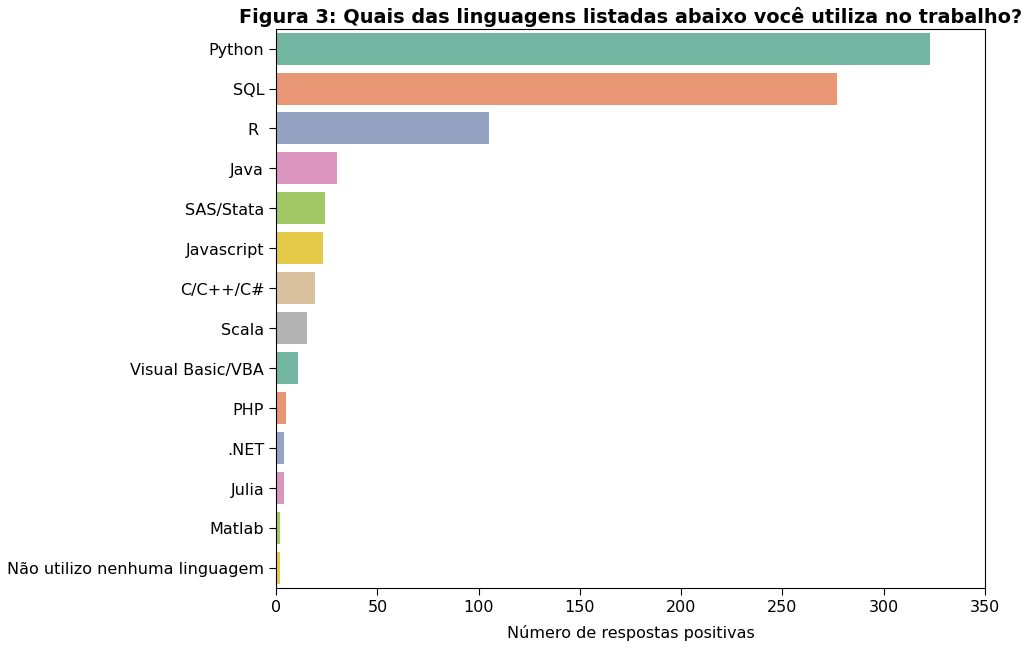

In [20]:
P4_d = buscador_colunas("'P4_d", df_analise_P4)
chaves_p4d = extrair_chaves(P4_d, 2)
valores_p4d = extrair_valores(P4_d, 2)

sns.barplot(x=valores_p4d, y=chaves_p4d, orient='h', palette='Set2')

plt.title('Figura 3: Quais das linguagens listadas abaixo você utiliza no trabalho?', fontweight="bold")
plt.xlabel('Número de respostas positivas')
plt.show()

## - É possível observar que há um domínio, já esperado, para a linguagem Python, amplamente utilizada no mercado de dados do mundo inteiro. 
### - A linguagem SQL é realmente muito utilizada pelos profissionais cientista de dados entrevistados. 
### - Destaca-se também a linguagem R e também JAVA. 
### - Por fim, percebe-se que já existem profissionais utilizando linguagem Julia. 
---
## Em seguida tem-se os dados relativos aos principais bancos de dados utilizados. 

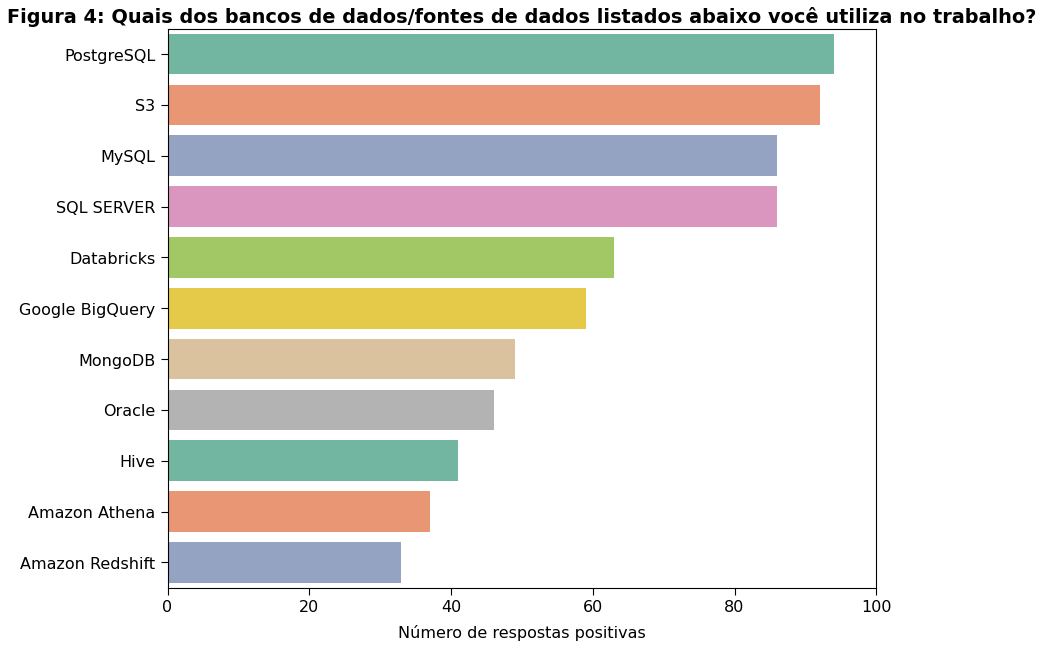

In [21]:
P4_f = buscador_colunas("'P4_f", df_analise_P4)
chaves_p4f = extrair_chaves(P4_f, 2)
valores_p4f = extrair_valores(P4_f, 2)

sns.barplot(x=valores_p4f[:11], y=chaves_p4f[:11], orient='h', palette='Set2')

plt.title('Figura 4: Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?', fontweight="bold")
plt.xlabel('Número de respostas positivas')
plt.show()

## E quanto aos serviços em nuvem utilizados?
#### - Há uma predominância das gigantes Amazon, Google e Microsoft.
- Isso se dá pela robustez oferecida às empresas.

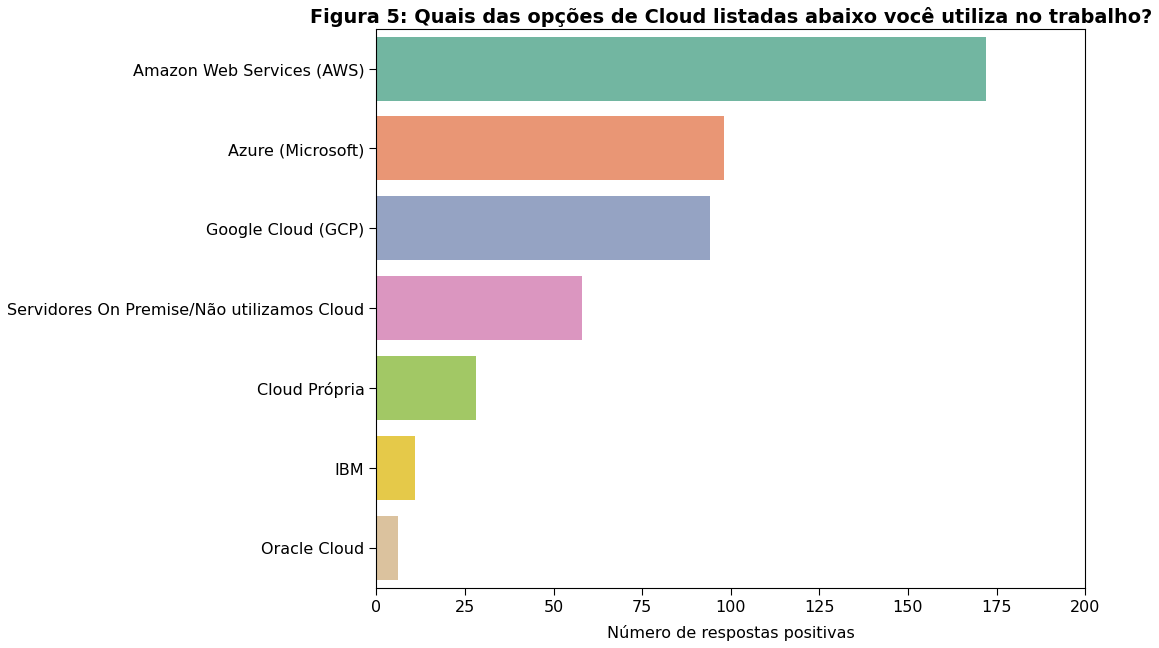

In [22]:
P4_g = buscador_colunas("'P4_g", df_analise_P4)
chaves_p4g = extrair_chaves(P4_g, 2)
valores_p4g = extrair_valores(P4_g, 2)

sns.barplot(x=valores_p4g, y=chaves_p4g, orient='h', palette='Set2')

plt.title('Figura 5: Quais das opções de Cloud listadas abaixo você utiliza no trabalho?', fontweight="bold")
plt.xlabel('Número de respostas positivas')
plt.show()

## Por fim, mas não menos importante, analisou-se quais ferramentas de Business Intelligence (BI) estão sendo mais utilizadas. 
- Essas ferramentas são de grande importância para a produção de relatórios técnicos e criação de dashboards nas empresas. 

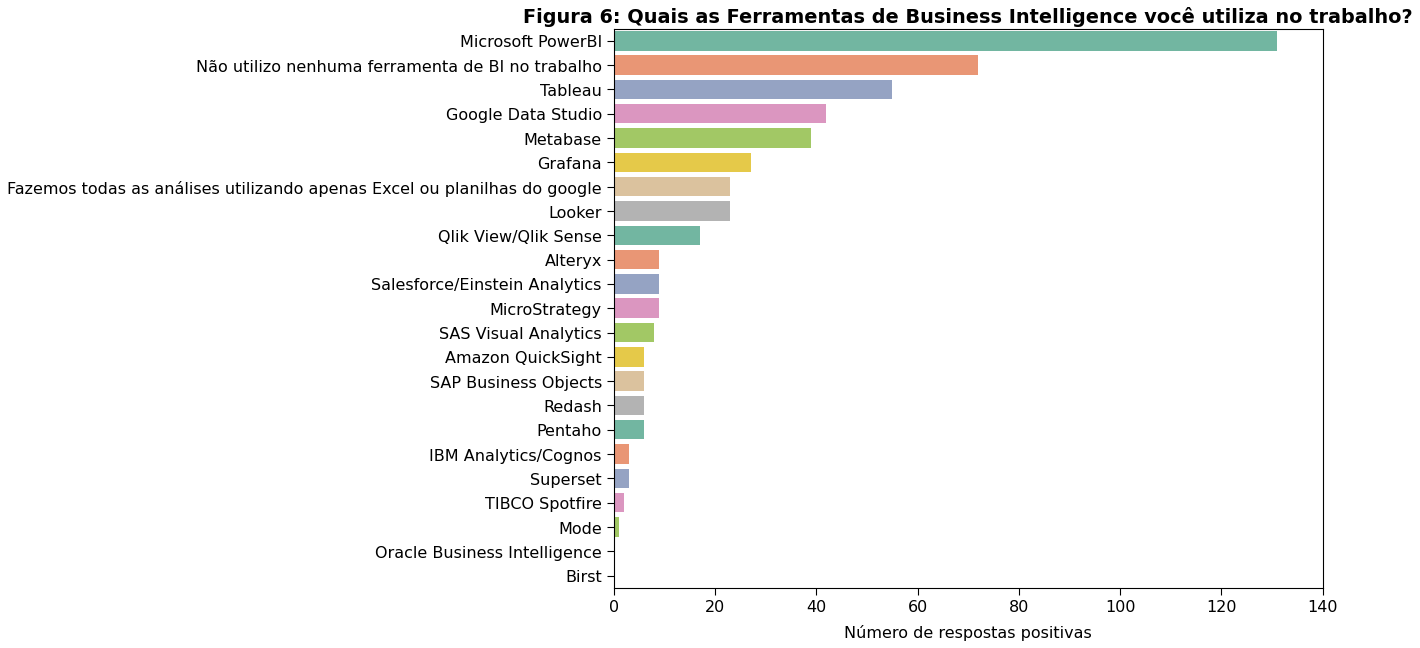

In [23]:
P4_h = buscador_colunas("'P4_h", df_analise_P4)
chaves_p4h = extrair_chaves(P4_h, 2)
valores_p4h = extrair_valores(P4_h, 2)

sns.barplot(x=valores_p4h, y=chaves_p4h, orient='h', palette='Set2')

plt.title('Figura 6: Quais as Ferramentas de Business Intelligence você utiliza no trabalho?', fontweight="bold")
plt.xlabel('Número de respostas positivas')
plt.show()

- Percebe-se que há uma grande predominância do Power BI da Microsoft, ferramenta gratuita e de grande aplicabilidade na indústria. 
- Também se destaca o Tableau. 
- Analisando-se todos os gráficos, surpreende (para quem não é da área como eu) a grande utilização de dados em formato de planilha e a utilização de aplicações como Excel e Planilhas do Google por muitos profissionais. 
- Não basta saber Python e SQL para ser um bom profissional de dados. De acordo com os dados aqui explanados, esse é um profissional com perfil multitarefas e que deve estar sempre buscando novas tecnologias para utilizar no seu dia a dia. 

## Outra pergunta que podemos fazer é: Houve alguma mudança no panorama de 2019 para cá? Para tanto, vamos comparar alguns dados importantes da pesquisa Data Hackers 2019 sobre o mercado de dados. 
### Essa pesquisa também está disponível no Kaggle!
##### <link>https://www.kaggle.com/datasets/datahackers/pesquisa-data-hackers-2019</link>
---
### Fazendo a mesma análise feita anteriormente, percebe-se que não houveram grandes mudanças de 2019 para cá. Apenas uma ou outra tecnologia ganhando ou perdendo algum destaque como pode ser observado na Tabela 1.

##### <center><b>Tabela 3</b> - Principais Fontes de Dados e Linguagens de programação utilizadas em 2019 pelos cientista de Dados.</center>

|Fonte de Dados|Utilização (%)||Linguagem Mais Utilizada|Utilização (%)|
|:-:|:-:||:-:|:-:|
|SQL|30,78||Python|37,71|
|Planilhas|27,59||SQL|31,63|
|NoSQL|17,30||R|16,06|

- Em 2019, SQL, Python, Análises em bancos de dados estruturados e análise de planilhas já eram as principais linguagens e fontes de dados utilizadas no mundo dos dados aqui no Brasil.

##### <center><b>Tabela 4</b> - Principais opções de computação em nuvem, bancos de dados e ferramentas de BI utilizadas em 2019 pelos cientista de Dados.</center>

|Cloud|Utilização (%)||Banco de Dados|Utilização (%)||Ferramenta de BI|Utilização(%)|
|:-:|:-:||:-:|:-:||:-:|:-:|
|AWS|41,89||PostgreSQL|15,21||PowerBI|23,39|
|Google Cloud Plataform|18,92||MySQL|12,90||Metabase|14,11|
|Azure|13,51||SQL_Server|11,52||Tableau|13,30|

- Percebe-se que as ferramentas praticamente não mudaram nesses 3 anos. 
- Destaque para a evolução do banco de dados S3, que em 2019 ocupava a quarta posição no ranking de utilização e em 2021 aparece em segundo lugar.

---

## E comparando-se com a pesquisa do Kaggle sobre o mercado de dados em 2021? 
###### <link>https://www.kaggle.com/competitions/kaggle-survey-2021</link>
- Essa pesquisa do Kaggle foi realizada entre 09/01/21 e 10/04/21.
- Foram tomadas 25.973 respostas sobre vários temas dos quais vamos destacar e relacionar alguns com o que foi estudado anteriormente.
    - Os resultados da pesquisa do Kaggle em relação aos temas aqui abordados são um reflexo do que já foi discutido, apresentando os mesmos padrões.

In [24]:
df_p8 = buscador_colunas("'P8", df_21)
df_p8

,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')","('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?')","('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')","('P8_b_b ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')","('P8_b_c ', 'Desenvolvo sistemas de recomendação (RecSys)')","('P8_b_d ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')","('P8_b_e ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')","('P8_b_f ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')","('P8_b_g ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')","('P8_b_h ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')","('P8_b_i ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')","('P8_b_j ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')","('P8_b_k ', 'Utilizo modelos de Machine Learning para detecção de fraude')","('P8_b_l ', 'Utilizo métodos de Visão Computacional')","('P8_b_m ', 'Utilizo modelos de Detecção de Churn')","('P8_c ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?')","('P8_c_a ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')","('P8_c_b ', 'Planilhas (Excel, Google Sheets etc)')","('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')","('P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?')","('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_b ', 'Entrando em contato com os times de negócio para definição d

In [25]:
df_p8_final = df_p8.join(df_P4["('P4_a ', 'Atuacao')"])

df_p8_final['Nível'] = df_21["('P2_g ', 'Nivel')"]

df_analise_p8 = df_p8_final.groupby(["('P4_a ', 'Atuacao')", 'Nível']).sum()

df_p8_DC = df_analise_p8.loc['Ciência de Dados']
df_p8_DC

,"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')","('P8_b_b ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')","('P8_b_c ', 'Desenvolvo sistemas de recomendação (RecSys)')","('P8_b_d ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')","('P8_b_e ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')","('P8_b_f ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')","('P8_b_g ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')","('P8_b_h ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')","('P8_b_i ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')","('P8_b_j ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')","('P8_b_k ', 'Utilizo modelos de Machine Learning para detecção de fraude')","('P8_b_l ', 'Utilizo métodos de Visão Computacional')","('P8_b_m ', 'Utilizo modelos de Detecção de Churn')","('P8_c_a ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')","('P8_c_b ', 'Planilhas (Excel, Google Sheets etc)')","('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')","('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em pr

In [26]:
P8_a = buscador_colunas("'P8_a", df_p8_DC)
P8_a

,"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')","('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')","('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')","('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')","('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
Nível,,,,,,,,,
Júnior,57.0,64.0,42.0,70.0,28.0,27.0,23.0,4.0,8.0
Pleno,101.0,87.0,85.0,96.0,48.0,46.0,35.0,12.0,16.0
Sênior,69.0,66.0,60.0,79.0,40.0,41.0,25.0,12.0,13.0


In [27]:
# modificando os nomes das colunas para melhorar a visualização posterior dos dados
colunas_p8a = ['Estudos Ad-hoc', 'Coleta e Limpeza de Dados', 'Ligação entre os times de negócio', 'Desenvolvimento de modelos de ML', 'Manutenção de modelos de ML', 'Práticas de MLOps', 'Dashboards', 'Estatística Avançada', 'Infraestrutura de modelos']
P8_a.columns = colunas_p8a

## Depois de um panorama geral das ferramentas utilizadas por um cientista de dados, chegou a hora de conhecer um pouco mais de como é o dia a dia desse profissional
#### - A seguir tem-se um representação das principais atividades do cientista de dados júnior. 
##### - obs: Quanto maior a área do quadrado, mais tempo essa atividade está presente na rotina de um DC.
##### - Aqui serão utilizados alguns dados da pesquisa sobre o cenários dos desenvolvedores do Stack Overflow em 2022.
###### <link>https://survey.stackoverflow.co/2022/</link>

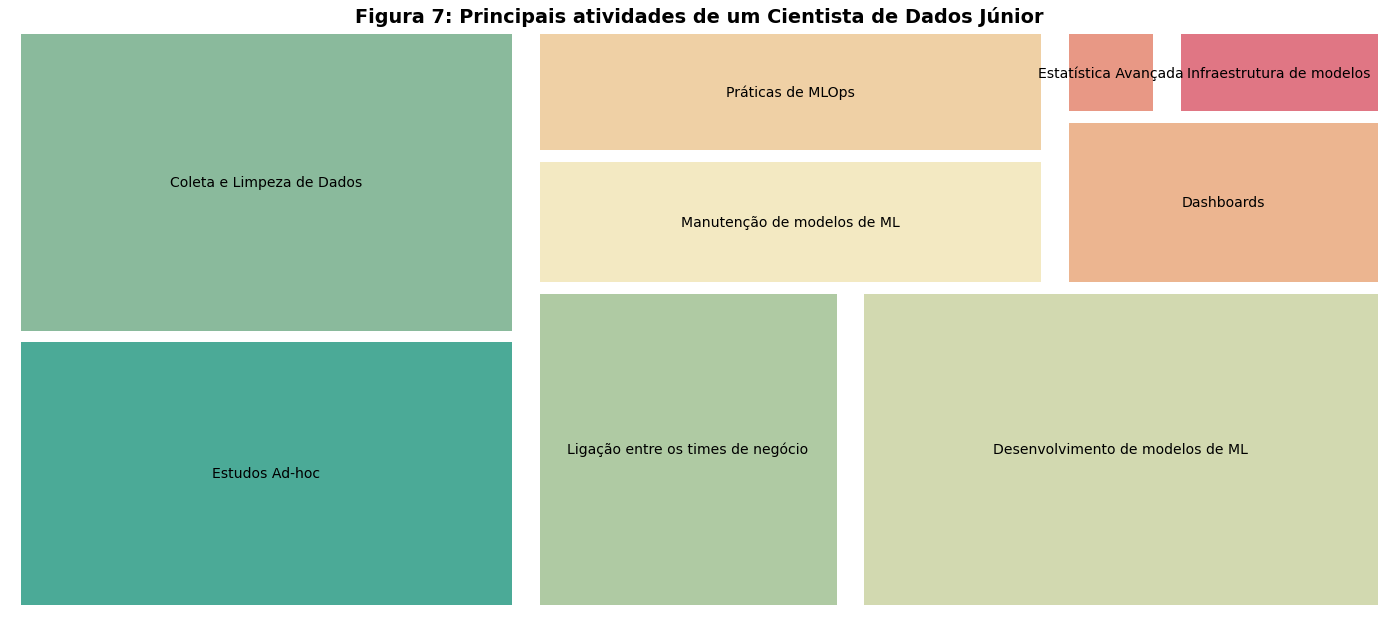

In [28]:
fig, ax = plt.subplots(figsize=(25,10))
plt.axis('off')

squarify.plot(sizes=P8_a.iloc[0], label=P8_a.columns, pad=True, alpha=0.7, color=cores, text_kwargs={'fontsize': 14})

plt.title('Figura 7: Principais atividades de um Cientista de Dados Júnior', fontweight="bold")
plt.show()

### Destaques:

- Em geral a coleta e limpeza de dados consome a maior parte do tempo na construção de modelos de machine learning, isso fica claro pela figura acima. 

- Estudos focados em um determinado cliente e o desenvolvimento de modelos de aprendizado de máquina tem bastante destaque.

- Skills focadas em relacionamento devem ser importantes, visto que deve haver uma boa integração entre as equipes de desenvolvimento e as focadas no negócio em si.

#### Relacionando alguns dados com a pesquisa do Kaggle 21

- Segundo a pesquisa do Kaggle, Pergunta 24, 35% dos cientistas de dados entrevistados (aqui não fiz distinção de nível) tem como principal atividade a análise e entendimento dos dados para tomada de decisões do negócio. Ou seja, uma síntese das principais atividades vistas aqui.

- Outras atividades importantes citadas foram a <b>construção de protótipos</b> para aplicação de modelos em novas áreas do negócio e a criação de <b>infraestrutura de dados</b> para a organização.

In [29]:
P8_b = buscador_colunas("'P8_b", df_p8_DC)
P8_b

,"('P8_b_a ', 'Utilizo modelos de regressão (linear, logística, GLM)')","('P8_b_b ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')","('P8_b_c ', 'Desenvolvo sistemas de recomendação (RecSys)')","('P8_b_d ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')","('P8_b_e ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')","('P8_b_f ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')","('P8_b_g ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')","('P8_b_h ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')","('P8_b_i ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')","('P8_b_j ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')","('P8_b_k ', 'Utilizo modelos de Machine Learning para detecção de fraude')","('P8_b_l ', 'Utilizo métodos de Visão Computacional')","('P8_b_m ', 'Utilizo modelos de Detecção de Churn')"
Nível,,,,,,,,,,,,,
Júnior,68.0,58.0,12.0,19.0,24.0,51.0,5.0,40.0,47.0,8.0,18.0,13.0,16.0
Pleno,102.0,92.0,23.0,38.0,52.0,82.0,9.0,83.0,54.0,9.0,30.0,14.0,39.0
Sênior,85.0,74.0,19.0,31.0,45.0,59.0,12.0,63.0,53.0,13.0,37.0,18.0,34.0


## Relacionados as atividades, estão os principais métodos e as principais técnicas utilizadas pelos cientistas de dados júnior para conclusão de suas atividades diárias.

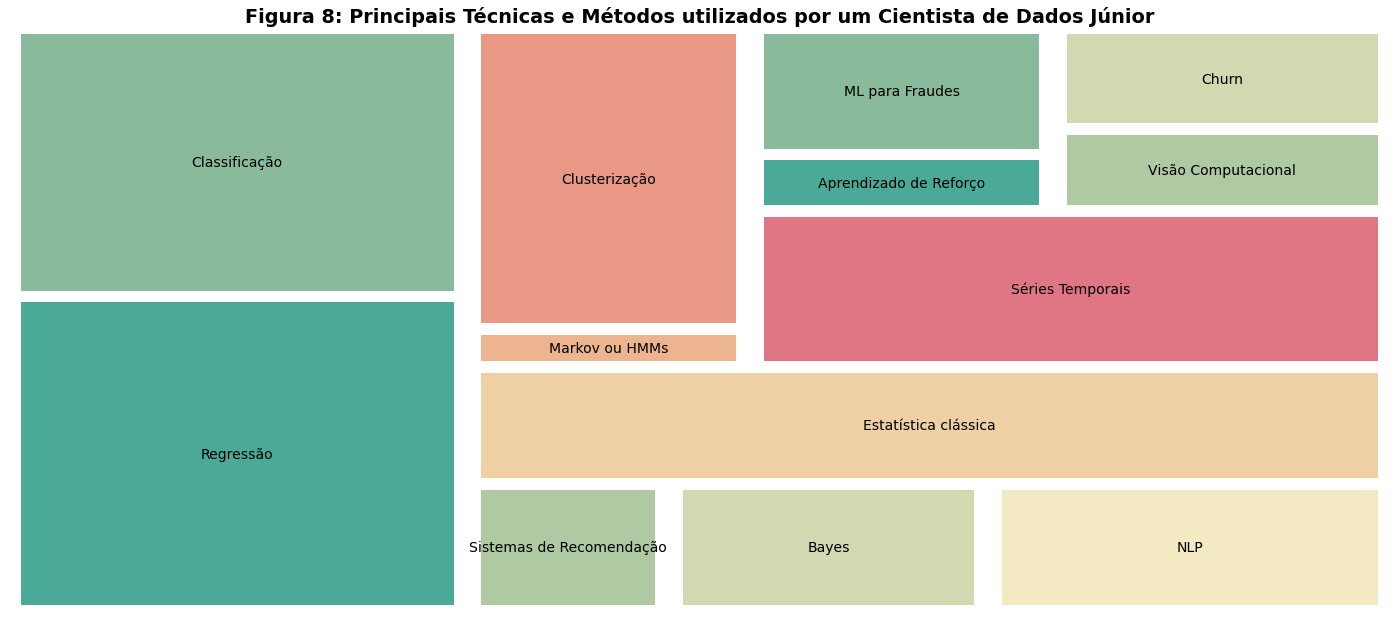

In [30]:
colunas_p8b = ['Regressão', 'Classificação', 'Sistemas de Recomendação', 'Bayes', 'NLP', 'Estatística clássica', 'Markov ou HMMs', 'Clusterização', 'Séries Temporais', 'Aprendizado de Reforço', 'ML para Fraudes', 'Visão Computacional', 'Churn']
P8_b.columns = colunas_p8b

fig, ax = plt.subplots(figsize=(25,10))
plt.axis('off')

squarify.plot(sizes=P8_b.iloc[0], label=P8_b.columns, pad=True, alpha=0.7, color=cores, text_kwargs={'fontsize': 14})

plt.title('Figura 8: Principais Técnicas e Métodos utilizados por um Cientista de Dados Júnior', fontweight="bold")
plt.show()

### Destaques (Figura 8):

- Modelos de Classificação e Regressão são os mais utilizados pelos cientistas de dados como esperado.

- De acordo com a pesquisa do Kaggle em 21 pode-se destacar alguns modelos:
    - Regressão linear, Árvores de Decisão, XGBoost, Redes Neurais em geral e abordagens Bayesianas. 
---
- Também se destacam a utilização de séries temporais e clusterização (análise não-supervisionada).

- Por fim, a estatística clássica é um pilar para dominar todas as técnicas aqui destacadas. Então sempre será imprescindível para o cargo.

### Quanto as principais tecnologias (Figura 9) pode-se destacar:

- É importante ter um conhecimento sobre os principais ambientes de desenvolvimentos utilizados na área de dados;
    - Visual Studio Code foi a mais utilizada pelos desenvolvedores de acordo com a pesquisa do Stack Overflow 2022;
    - PyCharm é a mais utilizada dentre os que estão iniciando os estudos.
    
- Conhecimento em ferramentas de versionamento de códigos é essencial.
    - Git é a mais citada na pesquisa do Stack Overflow 2022. 

- Principais Frameworks e tecnologias utilizadas (segundo pesquisa Stack Overflow 2022)
    - NumPy, Pandas, Tensorflow e Scikit-learn receberam as maiores menções na pesquisa.


In [31]:
P8_c = buscador_colunas("'P8_c", df_p8_DC)
P8_c

,"('P8_c_a ', 'Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc)')","('P8_c_b ', 'Planilhas (Excel, Google Sheets etc)')","('P8_c_c ', 'Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda)')","('P8_c_d ', 'Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc)')","('P8_c_e ', 'Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc)')","('P8_c_f ', 'Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc)')","('P8_c_g ', 'Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc)')","('P8_c_h ', 'Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc)')","('P8_c_i ', 'Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc)')","('P8_c_j ', 'Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc)')","('P8_c_k ', 'Ferramentas de estatística avançada como SPSS, SAS, etc.')","('P8_c_l ', 'Não utilizo nenhuma dessas ferramentas no meu dia a dia.')"
Nível,,,,,,,,,,,,
Júnior,31.0,67.0,83.0,47.0,5.0,12.0,32.0,7.0,59.0,22.0,8.0,1.0
Pleno,52.0,90.0,114.0,72.0,12.0,31.0,58.0,13.0,89.0,26.0,14.0,1.0
Sênior,52.0,63.0,86.0,53.0,13.0,20.0,43.0,10.0,65.0,17.0,12.0,0.0


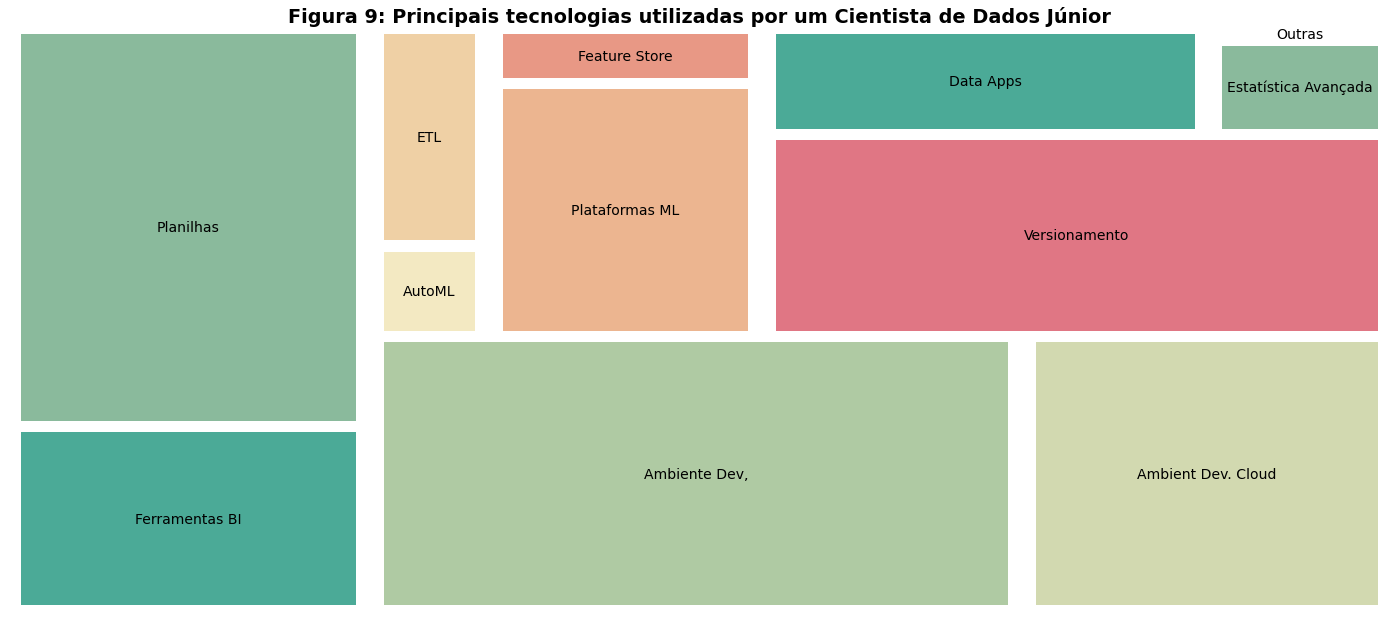

In [32]:
colunas_p8c = ['Ferramentas BI', 'Planilhas', 'Ambiente Dev,', 'Ambient Dev. Cloud', 'AutoML', 'ETL', 'Plataformas ML', 'Feature Store', 'Versionamento', 'Data Apps', 'Estatística Avançada', 'Outras']
P8_c.columns = colunas_p8c

fig, ax = plt.subplots(figsize=(25,10))
plt.axis('off')

squarify.plot(sizes=P8_c.iloc[0], label=P8_c.columns, pad=True, alpha=0.7, color=cores, text_kwargs={'fontsize': 14})

plt.title('Figura 9: Principais tecnologias utilizadas por um Cientista de Dados Júnior', fontweight="bold")
plt.show()

# Conclusões

### - Com a pesquisa State of Data Brazil 2021 foi possível criar um relatório sobre as principais atividades e tecnologias que um aspirante a cientista de dados deve dominar para se inserir no mercado de trabalho.

### - Correlacionando os dados dessa pesquisa com outras disponíveis nos últimos 3 anos, foi possível complementar e ratificar os dados disponíveis;

### - Importante observar a importância de dominar o básico de estatística e manipulação de dados em formato de tabelas e planilhas, pois são sempre muito citados nas pesquisas.